#### Install and Import Required Libraries

In [2]:
# Import necessary libraries
import numpy as np  
import pandas as pd  
import seaborn as sns  
import matplotlib.pyplot as plt  

from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder  
from sklearn.impute import SimpleImputer  
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.linear_model import LogisticRegression  
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score  
from sklearn.pipeline import Pipeline  
from sklearn.compose import ColumnTransformer  

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Load train dataset
df = pd.read_csv("train.csv")

In [4]:
# Display first few rows
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
# Check missing values
print(df.isnull().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [6]:
# Summary statistics
print(df.describe())

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


In [7]:
# Check data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


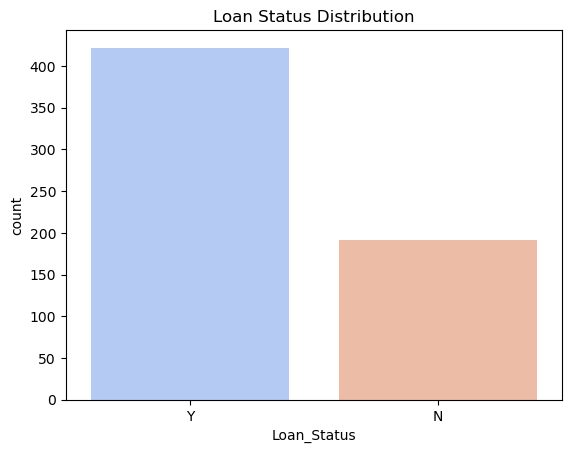

In [8]:
# Visualize target variable distribution
sns.countplot(x='Loan_Status', data=df, palette="coolwarm")
plt.title("Loan Status Distribution")
plt.show()

In [9]:
# Impute missing categorical values with mode
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [10]:
# Impute missing numerical values with mean
num_cols = df.select_dtypes(include=['number']).columns
for col in num_cols:
    df[col].fillna(df[col].mean(), inplace=True)

In [12]:
# Verify missing values are handled
print(df.isnull().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [13]:
# Convert categorical columns to numerical
label_enc = LabelEncoder()
for col in ['Loan_Status']:  # Encode target variable
    df[col] = label_enc.fit_transform(df[col])

In [14]:
# One-hot encoding for categorical variables
df = pd.get_dummies(df, columns=['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area'], drop_first=True)

In [15]:
# Create new features
df['Loan_Amount_Term_Years'] = df['Loan_Amount_Term'] / 12  # Convert months to years
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']  # Combine incomes
df['Income_to_Loan_Ratio'] = df['Total_Income'] / df['LoanAmount']  # Financial ratio

In [16]:
# Drop redundant columns
df.drop(['Loan_ID', 'Loan_Amount_Term'], axis=1, inplace=True)

In [17]:
df.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Amount_Term_Years,Total_Income,Income_to_Loan_Ratio
0,0,5849,0.0,146.412162,1.0,1,True,False,False,False,False,True,30.0,5849.0,39.948867
1,1,4583,1508.0,128.000000,1.0,0,True,True,False,False,False,False,30.0,6091.0,47.585938
2,0,3000,0.0,66.000000,1.0,1,True,True,False,True,False,True,30.0,3000.0,45.454545
3,0,2583,2358.0,120.000000,1.0,1,True,True,True,False,False,True,30.0,4941.0,41.175000
4,0,6000,0.0,141.000000,1.0,1,True,False,False,False,False,True,30.0,6000.0,42.553191


#### Feature Selection

In [18]:
# SelectKBest using ANOVA F-test
X = df.drop(columns=['Loan_Status'])
y = df['Loan_Status']

In [19]:
# Select top 8 features
selector = SelectKBest(score_func=f_classif, k=8)
X_new = selector.fit_transform(X, y)

ValueError: could not convert string to float: '3+'

In [20]:
# Drop non-numeric columns
X = df.drop(columns=['Loan_Status'])  # Target variable
y = df['Loan_Status']

In [21]:
# Check column data types
print(X.dtypes)

Dependents                  object
ApplicantIncome              int64
CoapplicantIncome          float64
LoanAmount                 float64
Credit_History             float64
Gender_Male                   bool
Married_Yes                   bool
Education_Not Graduate        bool
Self_Employed_Yes             bool
Property_Area_Semiurban       bool
Property_Area_Urban           bool
Loan_Amount_Term_Years     float64
Total_Income               float64
Income_to_Loan_Ratio       float64
dtype: object


In [22]:
# Convert categorical columns using One-Hot Encoding
X = pd.get_dummies(X, drop_first=True)

In [23]:
# Ensure no object-type columns remain
print(X.dtypes)

ApplicantIncome              int64
CoapplicantIncome          float64
LoanAmount                 float64
Credit_History             float64
Gender_Male                   bool
Married_Yes                   bool
Education_Not Graduate        bool
Self_Employed_Yes             bool
Property_Area_Semiurban       bool
Property_Area_Urban           bool
Loan_Amount_Term_Years     float64
Total_Income               float64
Income_to_Loan_Ratio       float64
Dependents_1                  bool
Dependents_2                  bool
Dependents_3+                 bool
dtype: object


In [24]:
# Apply SelectKBest feature selection
selector = SelectKBest(score_func=f_classif, k=8)
X_new = selector.fit_transform(X, y)

In [25]:
# Get selected feature names
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['CoapplicantIncome', 'Credit_History', 'Married_Yes',
       'Education_Not Graduate', 'Property_Area_Semiurban',
       'Property_Area_Urban', 'Dependents_1', 'Dependents_2'],
      dtype='object')


In [26]:
# Get selected feature names
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['CoapplicantIncome', 'Credit_History', 'Married_Yes',
       'Education_Not Graduate', 'Property_Area_Semiurban',
       'Property_Area_Urban', 'Dependents_1', 'Dependents_2'],
      dtype='object')


#### Train-Test Split & Data Scaling

In [27]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42)

In [28]:
# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Train & Evaluate Models

In [29]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

In [30]:
# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"\n{name} Performance:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("ROC-AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))


Logistic Regression Performance:
Accuracy: 0.7967479674796748
Confusion Matrix:
 [[19 24]
 [ 1 79]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.44      0.60        43
           1       0.77      0.99      0.86        80

    accuracy                           0.80       123
   macro avg       0.86      0.71      0.73       123
weighted avg       0.83      0.80      0.77       123

ROC-AUC Score: 0.7604651162790698

Random Forest Performance:
Accuracy: 0.7804878048780488
Confusion Matrix:
 [[23 20]
 [ 7 73]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.53      0.63        43
           1       0.78      0.91      0.84        80

    accuracy                           0.78       123
   macro avg       0.78      0.72      0.74       123
weighted avg       0.78      0.78      0.77       123

ROC-AUC Score: 0.7742732558139536


#### Hyperparameter Tuning (Random Forest)

In [31]:
from sklearn.model_selection import GridSearchCV

In [34]:
# Define parameter grid
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10]
}

In [35]:
# Grid search for best parameters
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [36]:
# Best parameters
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}


In [37]:
# Evaluate best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

print("\nOptimized Random Forest Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))
print("ROC-AUC Score:", roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1]))


Optimized Random Forest Performance:
Accuracy: 0.7886178861788617
Confusion Matrix:
 [[19 24]
 [ 2 78]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.44      0.59        43
           1       0.76      0.97      0.86        80

    accuracy                           0.79       123
   macro avg       0.83      0.71      0.73       123
weighted avg       0.81      0.79      0.77       123

ROC-AUC Score: 0.7899709302325582


In [38]:
# Convert categorical target variable to numeric (Loan_Status: Y=1, N=0)
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})

In [39]:
# Select only numeric features for correlation matrix
numeric_features = df.select_dtypes(include=[np.number])

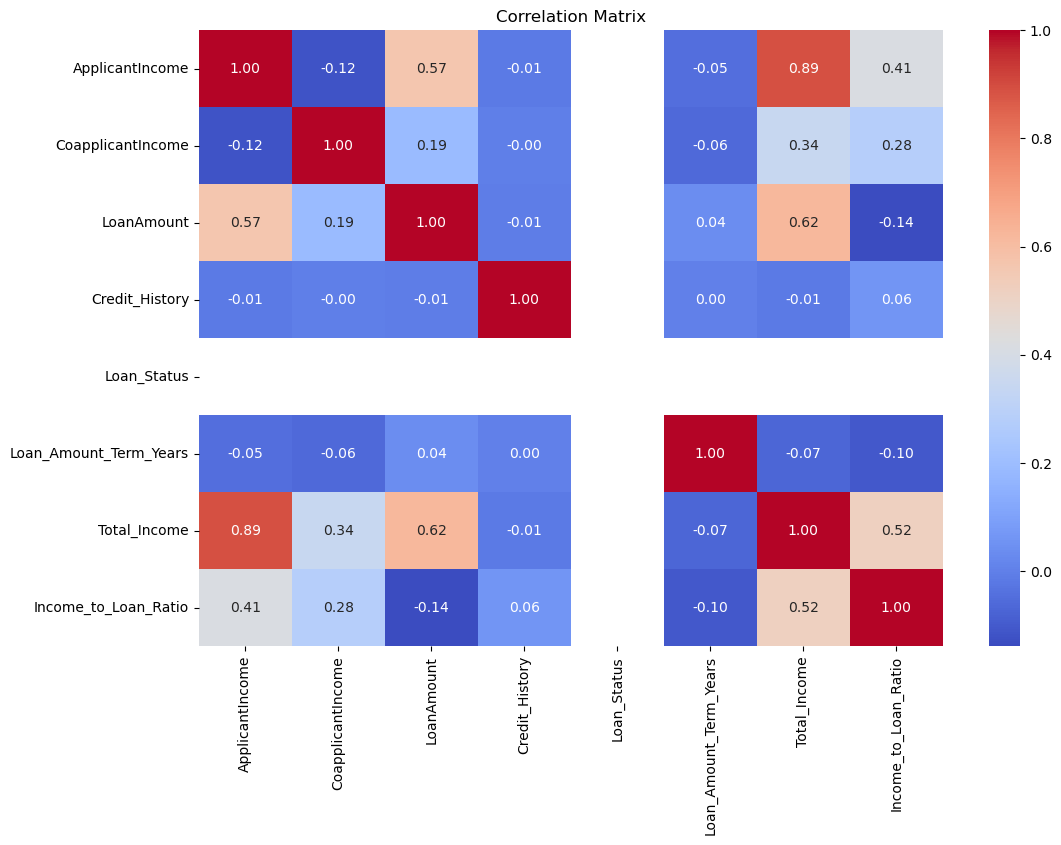

In [40]:
# Compute correlation
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_features.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [42]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [43]:
# Convert categorical target variable to numeric
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})

In [44]:
# Handling categorical features using Label Encoding
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le  # Save encoder for future reference

In [45]:
# Define features and target
X = df.drop("Loan_Status", axis=1)  # Features
y = df["Loan_Status"]  # Target variable

In [46]:
# Normalize features (Chi-Square requires non-negative data)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [47]:
# Apply SelectKBest with chi-square test
select_k_best = SelectKBest(chi2, k=8)  # Select top 8 features
X_new = select_k_best.fit_transform(X_scaled, y)

ValueError: Input y contains NaN.

In [48]:
# Ensure all values are positive (chi2 requirement)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [49]:
# Check for negative values (Debugging Step)
if (X_scaled < 0).any():
    print("Warning: X_scaled contains negative values!")

In [50]:
# Apply SelectKBest with chi-square test
try:
    select_k_best = SelectKBest(chi2, k=8)  # Select top 8 features
    X_new = select_k_best.fit_transform(X_scaled, y)
    selected_features = X.columns[select_k_best.get_support()]
    print("Selected Features using Chi-Square Test:", selected_features.tolist())

except ValueError as e:
    print("Error:", e)
    print("Possible causes: \n1. X contains negative values \n2. X contains continuous features \n3. y is not categorical (binary).")

Error: Input y contains NaN.
Possible causes: 
1. X contains negative values 
2. X contains continuous features 
3. y is not categorical (binary).


In [53]:
print(df.isnull().sum()) # missing values in dataset

Dependents                   0
ApplicantIncome              0
CoapplicantIncome            0
LoanAmount                   0
Credit_History               0
Loan_Status                614
Gender_Male                  0
Married_Yes                  0
Education_Not Graduate       0
Self_Employed_Yes            0
Property_Area_Semiurban      0
Property_Area_Urban          0
Loan_Amount_Term_Years       0
Total_Income                 0
Income_to_Loan_Ratio         0
dtype: int64


In [54]:
df.fillna(df.median(), inplace=True)  # For numeric columns

In [55]:
print(df.dtypes) # non numeric data in dataframe

Dependents                   int32
ApplicantIncome              int64
CoapplicantIncome          float64
LoanAmount                 float64
Credit_History             float64
Loan_Status                float64
Gender_Male                   bool
Married_Yes                   bool
Education_Not Graduate        bool
Self_Employed_Yes             bool
Property_Area_Semiurban       bool
Property_Area_Urban           bool
Loan_Amount_Term_Years     float64
Total_Income               float64
Income_to_Loan_Ratio       float64
dtype: object


In [56]:
df = df.apply(pd.to_numeric, errors='coerce') # Encoding Categorical columns

In [57]:
corr_matrix = df.select_dtypes(include=[np.number]).corr() # incorrect data selection

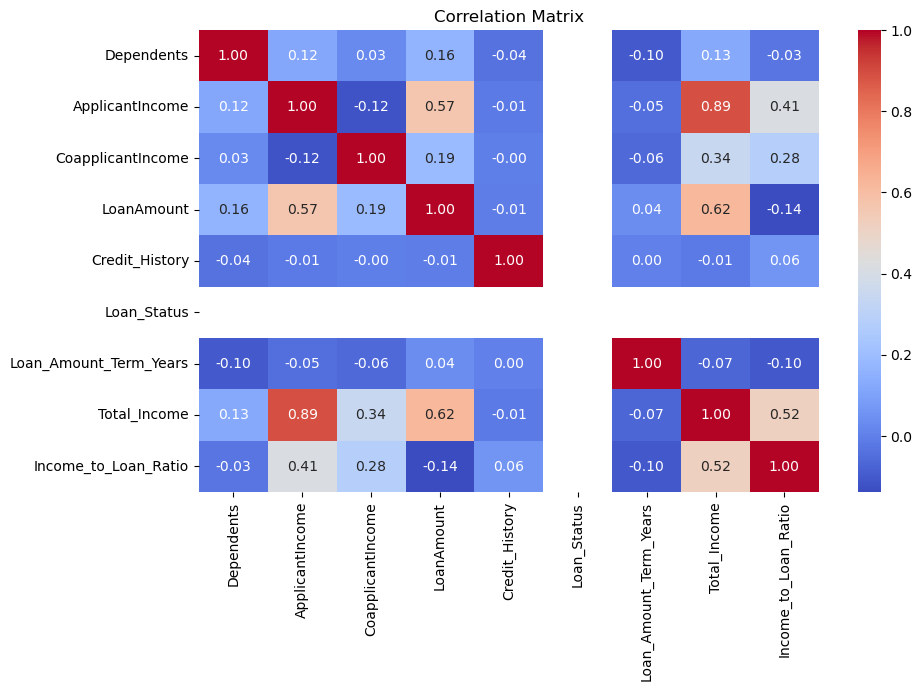

In [58]:
plt.figure(figsize=(10, 6)) # Adjusting fig size 
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [59]:
for col in df.columns:
    if df[col].dtype == "object":  # Categorical data
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:  # Numeric data
        df[col].fillna(df[col].median(), inplace=True)

In [60]:
df = pd.get_dummies(df, drop_first=True)

In [61]:
df = df.loc[:, ~df.columns.duplicated()]

In [62]:
print(df.isnull().sum())  # Check for remaining NaN values
print(df.dtypes)  # Check data types

Dependents                   0
ApplicantIncome              0
CoapplicantIncome            0
LoanAmount                   0
Credit_History               0
Loan_Status                614
Gender_Male                  0
Married_Yes                  0
Education_Not Graduate       0
Self_Employed_Yes            0
Property_Area_Semiurban      0
Property_Area_Urban          0
Loan_Amount_Term_Years       0
Total_Income                 0
Income_to_Loan_Ratio         0
dtype: int64
Dependents                   int32
ApplicantIncome              int64
CoapplicantIncome          float64
LoanAmount                 float64
Credit_History             float64
Loan_Status                float64
Gender_Male                   bool
Married_Yes                   bool
Education_Not Graduate        bool
Self_Employed_Yes             bool
Property_Area_Semiurban       bool
Property_Area_Urban           bool
Loan_Amount_Term_Years     float64
Total_Income               float64
Income_to_Loan_Ratio       float

In [63]:
# Compute correlation matrix
corr_matrix = df.corr()

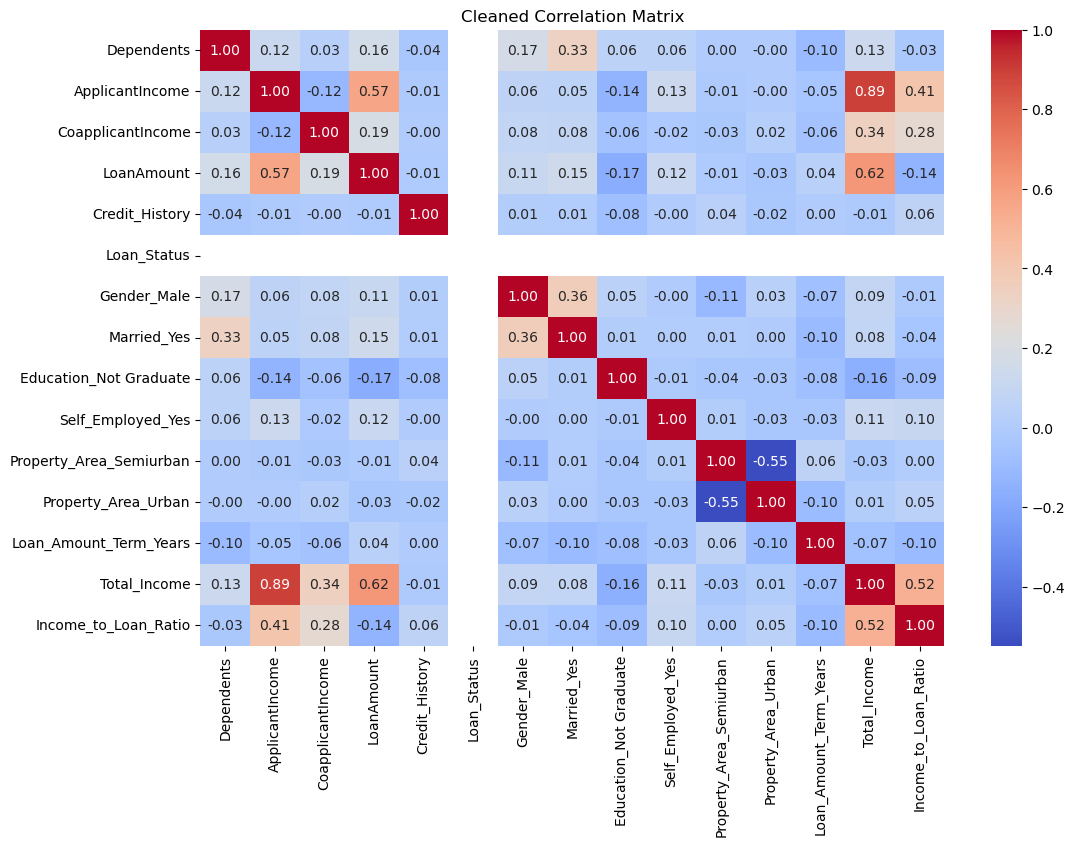

In [64]:
# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Cleaned Correlation Matrix")
plt.show()

In [65]:
df.drop(columns=["Loan_Status"], inplace=True) # Drop loan status column

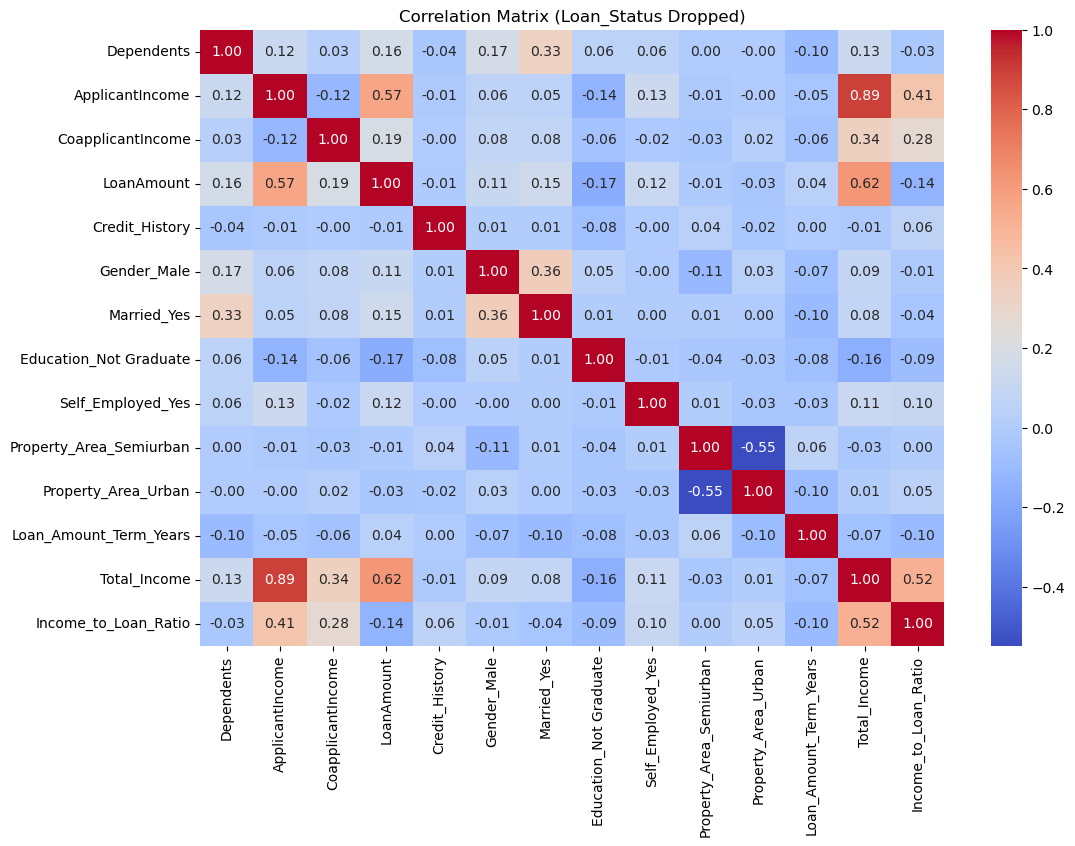

In [67]:
# Compute correlation matrix after dropping Loan_Status
corr_matrix = df.corr()

# Re Plotting heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix (Loan_Status Dropped)")
plt.show()